In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv(
    'predicted_thicknesses/sermeq_aggregated_bootstrap_predictions_parameterization_4.csv')

In [41]:
df

,Unnamed: 0,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates
0,0,RGI60-01.00001,34.022946,33.684115,15.297528,0.991595,0.237165,22.108154,18.020213,49.971306,33.684115,220.0
1,1,RGI60-01.00002,26.048418,26.472789,14.015526,0.969750,0.000118,21.393371,7.846396,39.674377,26.472789,220.0
2,2,RGI60-01.00003,26.142472,26.846613,14.088026,0.966860,0.000051,21.429278,7.102781,40.946377,26.846613,220.0
3,3,RGI60-01.00004,27.138691,28.043198,14.934564,0.963184,0.000018,22.624506,6.378251,42.236799,28.043198,220.0
4,4,RGI60-01.00005,27.457103,28.159443,15.196110,0.965078,0.000031,22.262425,6.709750,42.409385,28.159443,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
216496,216496,RGI60-19.02748,33.985715,31.288923,17.186046,0.969735,0.000118,23.414621,16.708597,51.022389,31.288923,220.0
216497,216497,RGI60-19.02749,30.287029,27.910456,15.673029,0.968804,0.000089,21.811795,14.703444,46.752474,27.910456,220.0
216498,216498,RGI60-19.02750,31.507194,30.518279,18.716345,0.965198,0.000032,27.856071,12.086015,51.218596,30.518279,220.0
216499,216499,RGI60-19.02751,38.210419,35.972251,24.865310,0.957126,0.000004,32.056097,10.764108,62.554775,35.972251,220.0


In [50]:
sum(df2['Edasi Volume (km3)']) / 1e3

110.58301652172813

In [49]:
df1 = gl.load_notebook_data(parameterization = '1') # no threshold
df2 = gl.load_notebook_data(parameterization = '4') # 0.25 threshold
df3 = gl.load_notebook_data(parameterization = '2') # 0.50 threshold
df4 = gl.load_notebook_data(parameterization = '3') # 0.75 threshold


In [3]:
glac = gl.load_training_data(RGI_input = 'y', 
                             pth = '/data/fast1/glacierml/data/')

In [4]:
glac = glac[['RGIId', 'Thickness']]
df1 = pd.merge(df1, glac, on = 'RGIId', how = 'inner')
df2 = pd.merge(df2, glac, on = 'RGIId', how = 'inner')
df3 = pd.merge(df3, glac, on = 'RGIId', how = 'inner')
df4 = pd.merge(df4, glac, on = 'RGIId', how = 'inner')


# Density plot of E&L vs GlaThiDa mean thickness

Sorting data...
Calculating point density...
Sorting data...
Calculating point density...
Sorting data...
Calculating point density...
Sorting data...
Calculating point density...


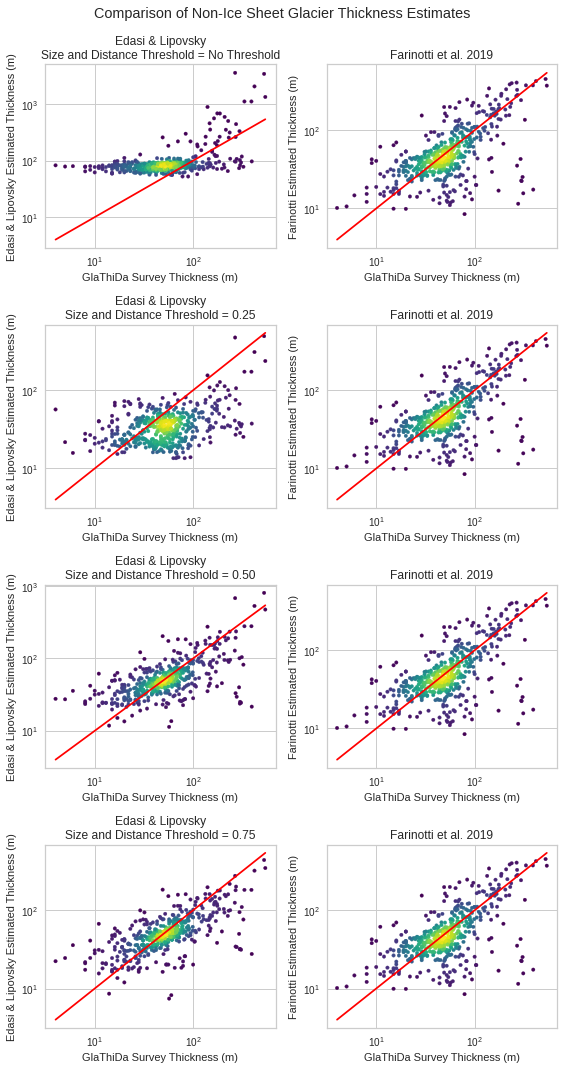

In [39]:
fig, ax = plt.subplots(4,2,figsize = (8,15),
#                        sharex = True, sharey = True
                      )

for n, dataset in enumerate((df1, df2, df3, df4)):
    data = dataset
    if n == 0:
        threshold = 'No Threshold'
    if n == 1:
        threshold = '0.25'
    if n == 2:
        threshold = '0.50'
    if n == 3:
        threshold = '0.75'
#     axs = plt.subplot(4, 1, n+1)

    data_1 = data['Edasi Mean Thickness']
    data_2 = data['Farinotti Mean Thickness']
    data_3 = data['Thickness']


    # data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
    # data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

    print('Sorting data...')
    x_1 = np.sort(data_1)
    y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

    x_2 = np.sort(data_2)
    y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

    x_3 = np.sort(data_3)
    y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

    print('Calculating point density...')
    # Calculate the point density
    xy = np.vstack([np.log10(data_1),np.log10(data_3)])

    z_1 = gaussian_kde(xy)(xy)

    yz = np.vstack([np.log10(data_2),np.log10(data_3)])

    z_2 = gaussian_kde(yz)(yz)
    
    ax[n,0].scatter(
            data['Thickness'],
            data['Edasi Mean Thickness'],
            c = z_1,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,0].set_xscale('log')
    ax[n,0].set_yscale('log')
    ax[n,0].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    
    ax[n,0].set_xlabel('GlaThiDa Survey Thickness (m)')
    ax[n,0].set_ylabel('Edasi & Lipovsky Estimated Thickness (m)')
    ax[n,0].set_title('Edasi & Lipovsky\nSize and Distance Threshold = ' + threshold)
    
    ax[n,1].scatter(
            data['Thickness'],
            data['Farinotti Mean Thickness'],
            c = z_2,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,1].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    ax[n,1].set_xscale('log')
    ax[n,1].set_yscale('log')
    ax[n,1].set_xlabel('GlaThiDa Survey Thickness (m)')
    ax[n,1].set_ylabel('Farinotti Estimated Thickness (m)')
    ax[n,1].set_title('Farinotti et al. 2019')
    
plt.suptitle('Comparison of Non-Ice Sheet Glacier Thickness Estimates', y = 0.99)
plt.tight_layout()

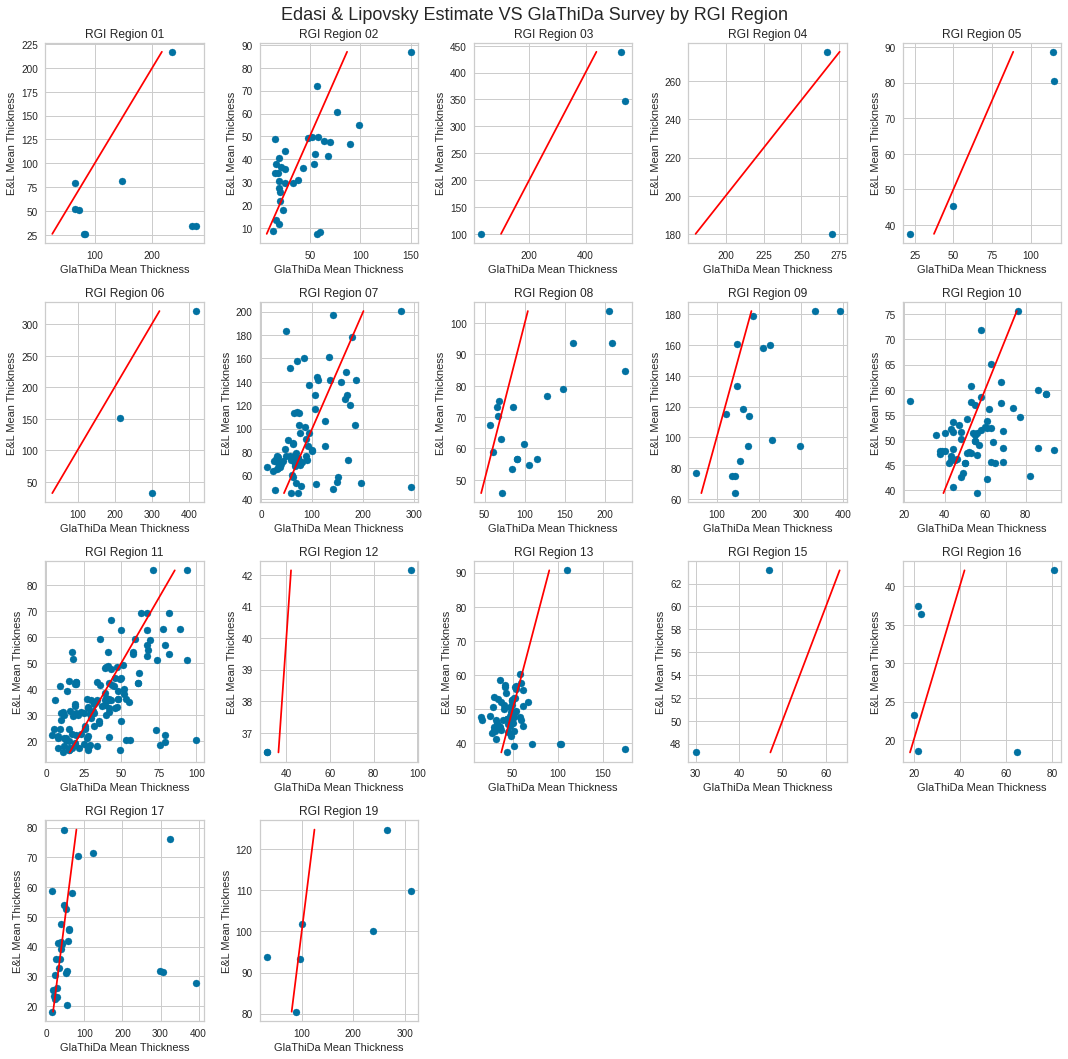

In [6]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(df2['region'].unique()):
    dft = data[data['region'] == reg]
    data_1 = dft['Edasi Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_xlabel('GlaThiDa Mean Thickness')
    ax.set_ylabel('E&L Mean Thickness')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_2,
        data_1,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('Edasi & Lipovsky Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()

# Do these terrible underestimated glaciers have anything in common?

In [7]:
data['Farinotti Residual'] = abs(data['Farinotti Mean Thickness'] - data['Thickness'])
data = data.sort_values('Farinotti Residual', ascending = False)

In [8]:
feature_list = [
    'Farinotti Mean Thickness', 'Thickness', 'Area', 'Slope', 
    'Lmax', 'Zmed', 'Zmax'
]

In [9]:
def rsf(rank = 'top', stat = 'mean'):
    

    residuals = []
    for feature in feature_list:
        if rank == 'top':
            if stat == 'mean':
                statistic = str(np.round(data[feature].head(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].head(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].head(111).std(),2))
        if rank == 'bot':
            if stat == 'mean':
                statistic = str(np.round(data[feature].tail(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].tail(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].tail(111).std(),2))
        residuals.append(statistic)
    return residuals

In [10]:
# feature_list.insert(0, 'Weighted Mean Thickness_x')
residual_stats_f = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_f

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,115.86,46.9,87.23,39.57,107.21,42.26
1,GlaThiDa Mean Thickness,128.93,46.18,94.0,40.0,99.88,42.0
2,Area (km^2),117.29,17.45,5.31,1.74,387.91,148.02
3,Slope(deg),15.32,18.16,13.6,17.7,8.61,5.75
4,Maximum Length (m),8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,Median Elevation (m),1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,Maximum Elevation (m),1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


In [11]:
data['E&L Residual'] = abs(data['Edasi Mean Thickness'] - data['Thickness'])
data = data.sort_values('E&L Residual', ascending = False)
feature_list.remove('Farinotti Mean Thickness')
feature_list.insert(0, 'Edasi Mean Thickness')

In [12]:
residual_stats_e = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_e

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,85.88,46.81,72.86,46.85,66.13,21.41
1,GlaThiDa Mean Thickness,141.78,46.59,107.0,47.0,108.08,21.29
2,Area (km^2),112.65,3.92,5.31,1.8,329.87,13.06
3,Slope(deg),15.2,18.8,13.6,17.9,8.68,6.07
4,Maximum Length (m),9603.23,2844.18,3928.0,2208.0,13970.13,3213.53
5,Median Elevation (m),1464.95,2991.48,1050.0,3102.0,1411.98,1153.02
6,Maximum Elevation (m),1784.98,3363.14,1360.0,3498.0,1360.6,1143.01


In [13]:
select = [x for x in residual_stats_f.columns if x != 'Feature']
df_f = residual_stats_f[select]
df_f

select = [x for x in residual_stats_e.columns if x != 'Feature']
df_e = residual_stats_e[select]
df_e

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,85.88,46.81,72.86,46.85,66.13,21.41
1,141.78,46.59,107.0,47.0,108.08,21.29
2,112.65,3.92,5.31,1.8,329.87,13.06
3,15.2,18.8,13.6,17.9,8.68,6.07
4,9603.23,2844.18,3928.0,2208.0,13970.13,3213.53
5,1464.95,2991.48,1050.0,3102.0,1411.98,1153.02
6,1784.98,3363.14,1360.0,3498.0,1360.6,1143.01


In [14]:
df_f

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,115.86,46.9,87.23,39.57,107.21,42.26
1,128.93,46.18,94.0,40.0,99.88,42.0
2,117.29,17.45,5.31,1.74,387.91,148.02
3,15.32,18.16,13.6,17.7,8.61,5.75
4,8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


# Build regional statistics difference table

In [15]:
def find_residual_stat_diff(stat = 'length', region = '01', study = 'edasi'):
    
    dft = data[data['region'] == region]
    
    if stat == 'mean':
        
        mean_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).mean()
        mean_g = np.array(dft['Thickness'] - dft['Thickness']).mean()
        mean_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).mean()
        statistic_e = mean_e - mean_g
        statistic_f = mean_f - mean_g
    
    if stat == 'median':
        e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness'])
        median_e = np.median(e)
        g = np.array(dft['Thickness'] - dft['Thickness'])
        median_g = np.median(g)
        f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness'])
        median_f = np.median(f)
        statistic_e = median_e - median_g
        statistic_f = median_f - median_g
    
    if stat == 'std':
        std_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).std()
        std_g = np.array(dft['Thickness'] - dft['Thickness']).std()
        std_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).std()
        statistic_e = std_e - std_g
        statistic_f = std_f - std_g
    if stat == 'length':
        statistic_e = len(dft)
        statistic_f = len(dft)
#     print(statistic)
#     print(residuals)
    if study == 'edasi':
        residual = statistic_e
    if study == 'farinotti':
        residual = statistic_f
#     print(residuals)
    return residual

In [16]:
region_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '15', '16', '17', '19']

In [17]:
mean_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'edasi')
    mean_diff_e.append(res)

mean_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'farinotti')
    mean_diff_f.append(res)

median_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'edasi')
    median_diff_e.append(res)

median_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'farinotti')
    median_diff_f.append(res)

std_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'edasi')
    std_diff_e.append(res)

std_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'farinotti')
    std_diff_f.append(res)
    
trainable_glaciers = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'length', region = reg, study = 'farinotti')
    trainable_glaciers.append(res)
print(*trainable_glaciers)

9 35 3 2 4 3 81 20 18 66 141 3 68 2 6 32 7


In [18]:
stats = pd.DataFrame({
    'RGI Region':[
        *region_list
    ],
    'E&L Difference of Mean':[
        *mean_diff_e
    ],
    'Farinotti Difference of Mean':[
        *mean_diff_f
    ],
    'E&L Difference of Median':[
        *median_diff_e
    ],    
    'Farinotti Difference of Median':[
        *median_diff_f
    ],
    'E&L Difference of STD':[
        *std_diff_e
    ],
    'Farinotti Difference of STD':[
        *std_diff_f
    ],
    'Trainable Glaciers':[
        *trainable_glaciers
    ]
})
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
0,01,77.570765,77.981038,56.130807,59.614202,89.709140,97.924514,9
1,02,6.233137,8.326012,3.397561,0.798704,22.429924,25.048409,35
2,03,70.425490,40.043923,87.304413,75.065980,108.934935,123.006823,3
3,04,40.824058,-98.419435,40.824058,-98.419435,49.054063,40.415865,2
4,05,12.271767,13.129670,15.046234,10.986469,19.313922,15.270133,4
5,06,143.716861,79.675773,99.257504,-4.212620,89.030927,140.525549,3
6,07,-1.636833,-19.137063,-7.967401,-16.584312,52.706979,68.170291,81
7,08,40.105700,11.899313,33.197364,15.459857,41.372354,26.900465,20
8,09,70.465731,-39.455114,64.711441,-37.697105,64.709687,58.808158,18
9,10,5.315256,19.841131,4.556819,18.040144,13.935395,16.786918,66


In [19]:
stats = stats.sort_values('E&L Difference of Mean', ascending = True, key = abs)
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
12,13,0.145944,12.522796,-2.389165,7.615041,23.317148,25.301089,68
6,07,-1.636833,-19.137063,-7.967401,-16.584312,52.706979,68.170291,81
10,11,2.001130,-4.490770,0.616531,-5.107185,18.212611,19.008386,141
9,10,5.315256,19.841131,4.556819,18.040144,13.935395,16.786918,66
1,02,6.233137,8.326012,3.397561,0.798704,22.429924,25.048409,35
14,16,9.465550,5.009044,0.073641,-0.266172,24.468290,18.796392,6
4,05,12.271767,13.129670,15.046234,10.986469,19.313922,15.270133,4
11,12,14.700624,6.926283,-5.380040,-7.420776,28.398347,20.289805,3
13,15,-16.694499,1.233117,-16.694499,1.233117,0.528246,0.460530,2
15,17,38.085279,30.418439,1.097419,-4.876753,97.629416,99.025596,32


In [20]:
# stats = stats.drop(stats[stats['E&L Difference of Mean'] <= -200].index)

17


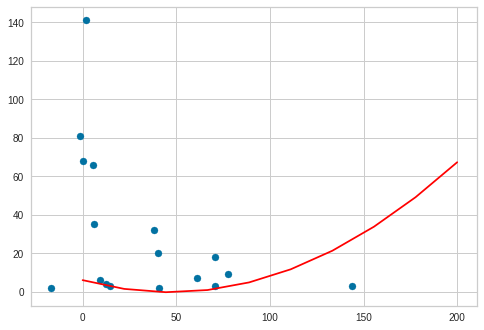

In [21]:
plt.scatter(
    (stats['E&L Difference of Mean']),
    stats['Trainable Glaciers'],
#     marker = '.'
)
x = np.arange(-1, 250, 250/16)
print(len(x))
y = stats['E&L Difference of Mean']

# print(len(y))
model = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(0, 200, 10)

plt.plot(polyline, model(polyline), color = 'red')

In [22]:
from scipy.stats import pearsonr

In [23]:
print(len(stats))

17


In [24]:
x = (stats['Farinotti Difference of Mean'])
y = (stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.10202870540302894, 0.6967939817834635)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 2.457563932539401
	b = popt[1] = 0.6968789679003474


Text(0.5, 0, 'E&L Difference of Mean')

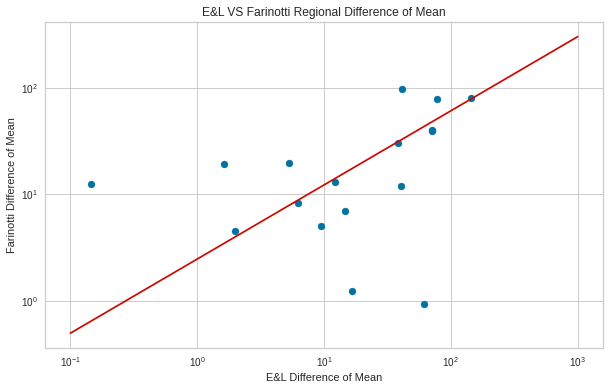

In [25]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Farinotti Difference of Mean'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')
def myExpFunc(x, a, b):
    return a * np.power(x, b)

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Mean')
plt.xlabel('E&L Difference of Mean')

In [26]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
pearsonr(x,y)

(0.5415175315135846, 0.024762255757949093)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 5.726232062770041
	b = popt[1] = 0.48427185036151343


Text(0.5, 0, 'E&L Difference of Median')

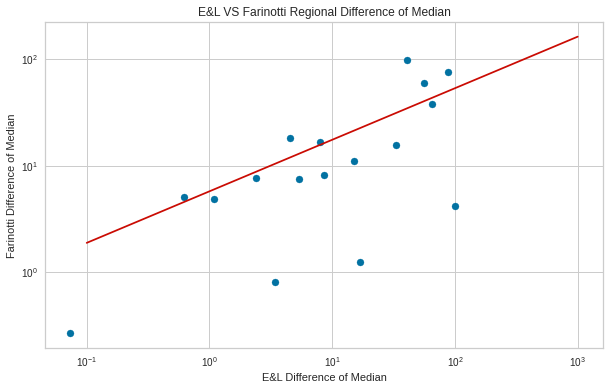

In [27]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Median')
plt.xlabel('E&L Difference of Median')

In [28]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
pearsonr(x,y)

(0.9457586527741342, 1.0082242492930005e-08)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 0.43066713181521193
	b = popt[1] = 1.2284695399379548


Text(0.5, 0, 'E&L Difference of STD')

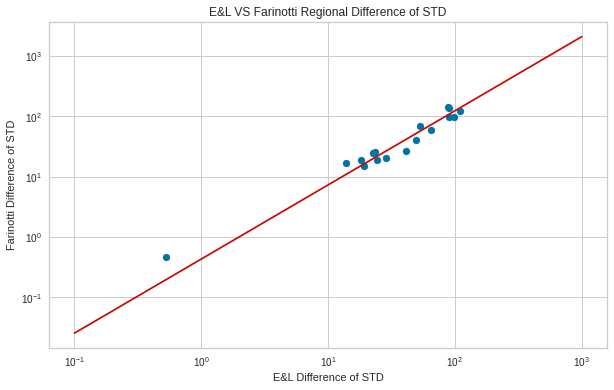

In [29]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of STD')
plt.xlabel('E&L Difference of STD')

In [30]:
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.48711722228869814, 0.04734832900989516)

In [31]:
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.3143476522988228, 0.21914154114427867)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 58.54199047436768
	b = popt[1] = -0.2766239986618057
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 35.54926888380554
	b = popt[1] = -0.07231450973244045


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Mean')

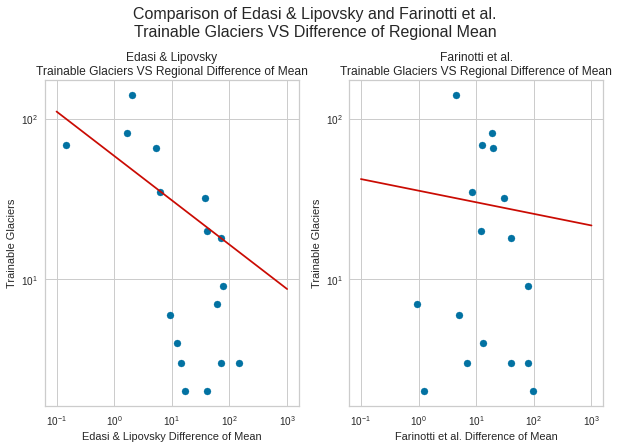

In [32]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Mean')
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Mean')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Mean', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [33]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.4355292109788798, 0.08056457711494339)

In [34]:
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.27307922863871836, 0.28891834846781933)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 40.79717248793947
	b = popt[1] = -0.15818667850773574
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.112051754409247
	b = popt[1] = -0.026037653386011946


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Median')

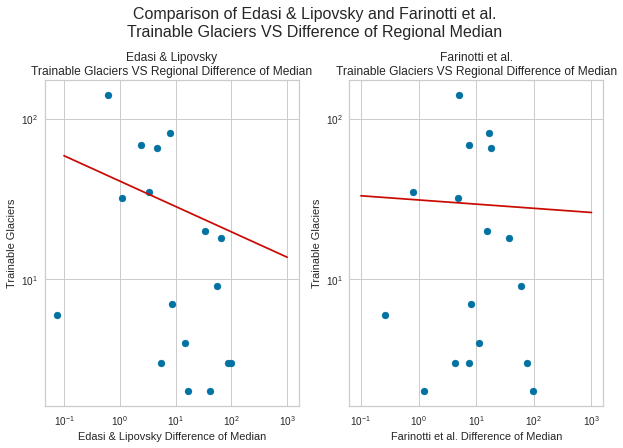

In [35]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Median')
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Median')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Median', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [36]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)


(-0.32086105157563294, 0.2092240611789598)

In [37]:
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.2694998156738846, 0.29553686732771456)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 34.73075090071561
	b = popt[1] = -0.04781308890419197
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.622909092885582
	b = popt[1] = -0.02081445497693879


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional STD')

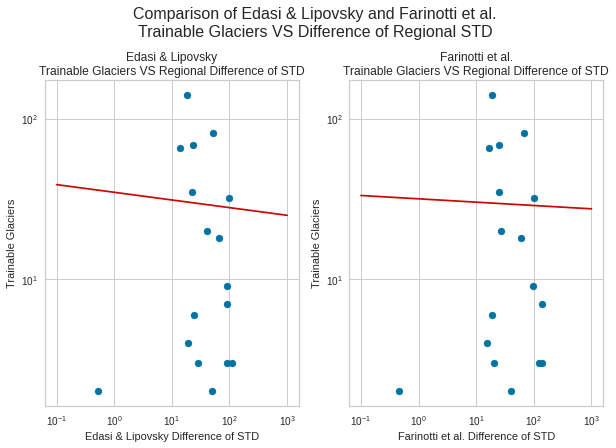

In [38]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of STD')
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of STD')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional STD', y = 1.05, fontsize = 16
)
# plt.tight_layout()